In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib as mpl
import random

In [ ]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0, 2, 15)
colores = cmap(saltos)

In [ ]:
entrenamiento = pd.read_csv('/content/drive/My Drive/Entrenamieto_ECI_2020.csv')
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


Uso de divisas

In [ ]:
divisas = entrenamiento.groupby('ASP_Currency').agg({'ID':'count'})
divisas = divisas.rename(columns = {'ID':'Oportunidades'})
divisas.reset_index()


,ASP_Currency,Oportunidades
0,AUD,556
1,EUR,4503
2,GBP,5
3,JPY,4522
4,USD,7361


Text(0.5, 1.0, 'Divisas Más Usadas')

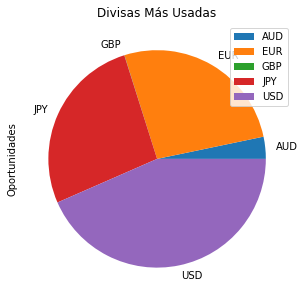

In [ ]:
grafico1 = divisas.plot.pie(y='Oportunidades', figsize=(5, 5))
grafico1.set_title('Divisas Más Usadas')

Analisis de divisas mas usadas

In [ ]:
divisas_mas_usadas = entrenamiento[(entrenamiento['ASP_Currency'] == 'USD') | (entrenamiento['ASP_Currency'] == 'EUR')]
divisas_mas_usadas

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245

In [ ]:
oportunidades_en_dolares = entrenamiento[(entrenamiento['ASP_Currency'] == 'USD')]
oportunidades_en_dolares

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.4800,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.5300,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.5300,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_939,5,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.5300,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,28,USD,14838277.50,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_1618,6,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,NaT,10/7/2016,Person_Name_8,Product_Family_164,Product_Name_308,USD,0.3800,USD,0.3800,2/1/2017,5/1/2017,2017 - 2,Q1,2017,NaT,7,USD,2659494.60,USD,2659494.6,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16930,28372,Americas,SE America,1,0,1,0,0,Bureaucratic_Code_5,9/25/2015,Source_7,United States,Account_Name_115,Opportunity_Name_6880,12793,None,Person_Name_64,Person_Name_12,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,12/4/2015,None,None,None,None,None,None,NaT,12/30/2016,3/9/2016,Person_Name_12,Product_Family_158,Product_Name_286,USD,0.6400,USD,0.6400,4/4/2016,6/30/2016,2016 - 4,Q2,2016,NaT,120,USD,76800640.00,USD,76800640.0,Closed Lost,Prod_Category_A_None
16940,20827,Americas,NE America,1,

In [ ]:
oportunidades_en_dolares = oportunidades_en_dolares.groupby('Stage').agg({'ID':'count'})
oportunidades_en_dolares = oportunidades_en_dolares.rename(columns = {'ID':'Oportunidades'})
oportunidades_en_dolares.reset_index()

,Stage,Oportunidades
0,Closed Lost,3729
1,Closed Won,3592
2,Negotiation,16
3,Proposal,21
4,Qualification,3


In [ ]:
oportunidades_en_euros = entrenamiento[(entrenamiento['ASP_Currency'] == 'EUR')]
oportunidades_en_euros

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.520,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.530,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
62,18557,EMEA,Italy,1,1,1,1,0,Bureaucratic_Code_4,7/27/2013,Source_7,Italy,Account_Name_1067,Opportunity_Name_9078,19,None,Person_Name_2,Person_Name_39,Account_Type_0,Opportunity_Type_7,Non Binding,Delivery_Terms_2,12/9/2015,None,None,None,None,None,None,NaT,12/23/2015,10/28/2016,Person_Name_4,Product_Family_164,Product_Name_310,EUR,0.550,USD,0.62210,4/11/2016,4/15/2016,2016 - 4,Q2,2016,NaT,0,EUR,259875.0,EUR,259875.0,Closed Lost,Prod_Category_A_None
63,13392,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_7,Germany,Account_Name_263,Opportunity_Name_4062,20,None,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_8,Non Binding,Delivery_Terms_2,12/9/2015,None,None,None,None,None,None,NaT,1/8/2016,12/9/2015,Person_Name_13,Product_Family_77,Product_Name_100,EUR,0.530,USD,0.59948,1/18/2016,1/29/2016,2016 - 1,Q1,2016,NaT,0,EUR,103350.0,EUR,103350.0,Closed Won,Prod_Category_A_None
66,18491,EMEA,United Kingdom,0,0,0,0,0,Bureaucratic_Code_4,1/8/2014,None,United Kingdom,Account_Name_270,Opportunity_Name_2804,23,None,Person_Name_18,Person_Name_18,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/10/2015,None,None,None,None,None,None,NaT,12/15/2015,1/12/2017,Person_Name_39,Product_Family_77,Product_Name_100,EUR,0.550,USD,0.62210,1/8/2016,1/12/2016,2016 - 1,Q1,2016,NaT,0,EUR,214500.0,EUR,214500.0,Closed Won,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16938,28767,EMEA,Germany,1,0,0,0,0,Bureaucratic_Code_5,12/4/2015,None,Germany,Account_Name_586,Opportunity_Name_5088,12798,None,Person_Name_13,Person_Name_13,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,2/5/2016,10/21/2016,Person_Name_13,Product_Family_85,Product_Name_110,EUR,0.470,USD,0.53161,8/15/2016,9/30/2016,2016 - 8,Q3,2016,NaT,3,EUR,1307775.0,EUR,1307775.0,Closed Lost,Prod_Category_A_None
16939,18324,EMEA,Norway,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,Source_9,Germany,Account_Name_533,Opportunity_Name_7202,12799,224,Person_Name_13,Person_Name_13,Account_Type_0,Opportunity_Type_1,Non Bi

In [ ]:
oportunidades_en_euros = oportunidades_en_euros.groupby('Stage').agg({'ID':'count'})
oportunidades_en_euros = oportunidades_en_euros.rename(columns = {'ID':'Oportunidades'})
oportunidades_en_euros.reset_index()

,Stage,Oportunidades
0,Closed Lost,2079
1,Closed Won,2422
2,Negotiation,1
3,Proposal,1


Analisis de dolares

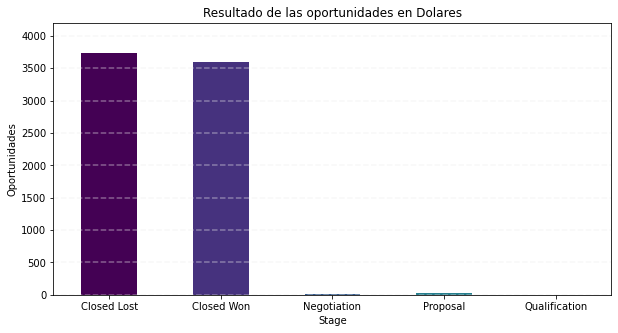

In [ ]:
graf1 = oportunidades_en_dolares['Oportunidades'].plot(kind='bar', figsize=(10,5), rot=360, title='Resultado de las oportunidades en Dolares', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportunidades')
ax.set_xlabel('Stage')
lineas = graf1.get_yticks()
for i in lineas:
      graf1.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')

analisis de euros

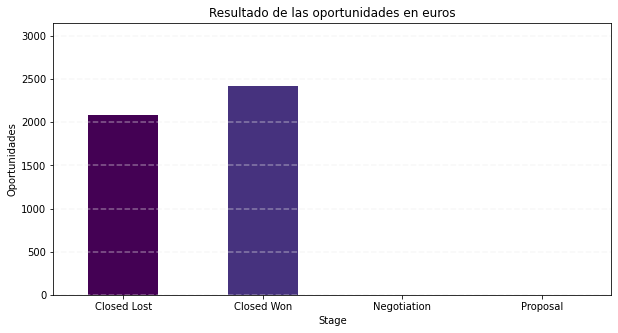

In [ ]:
graf2 = oportunidades_en_euros['Oportunidades'].plot(kind='bar', figsize=(10,5), rot=360, title='Resultado de las oportunidades en euros', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportunidades')
ax.set_xlabel('Stage')
lineas = graf2.get_yticks()
for i in lineas:
      graf2.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')

In [ ]:
oportunidades_en_yenes = entrenamiento[(entrenamiento['ASP_Currency'] == 'JPY')]
oportunidades_en_yenes

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
8,24353,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6151,8,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_6,Product_Name_6,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,JPY,15600.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6151,8,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_4,Product_Name_4,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,JPY,4400.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
10,24356,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6151,8,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_226,Product_Name_491,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,JPY,6200.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
11,24357,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6151,8,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_23,Product_Name_23,JPY,NaN,USD,NaN,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,JPY,140000.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
12,24358,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,None,Japan,Account_Name_1888,Opportunity_Name_6151,8,None,Person_Name_50,Person_Name_50,Account_Type_2,Opportunity_Type_7,Non Binding,Delivery_Terms_4,12/9/2015,None,None,None,None,None,None,NaT,NaT,4/5/2016,Person_Name_50,Product_Family_77,Product_Name_100,JPY,78.0,USD,0.70125,2/29/2016,2/29/2016,2016 - 2,Q1,2016,NaT,0,JPY,304200.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16919,21317,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,8/22/2014,None,Japan,Account_Name_1175,Opportunity_Name_7113,12784,2,Person_Name_66,Person_Name_66,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/2/2015,None,None,None,None,None,None,NaT,NaT,1/6/2016,Person_Name_66,Product_Family_73,Product_Name_85,JPY,78.0,USD,0.70125,1/11/2016,1/15/2016,2016 - 1,Q1,2016,NaT,0,JPY,3222180.0,JPY,4651580.0,Closed Won,Prod_Category_A_None
16923,27689,Japan,None,1,1,0,0,0,Bureaucratic_Code_4,6/11/2015,Source_3,Japan,Account_Name_1074,Opportunity_Name_6488,12786,None,Person_Name_61,Person_Name_66,Account_Type_0,Opportunity_Type_1,Non Binding,Delivery_Terms_5,12/2/2015,None,None,None,None,None,None,NaT,1/23/2016,12/24/2015,Person_Name_66,Product_Family_77,Pro

In [ ]:
oportunidades_en_yenes = oportunidades_en_yenes.groupby('Stage').agg({'ID':'count'})
oportunidades_en_yenes = oportunidades_en_yenes.rename(columns = {'ID':'Oportunidades'})
oportunidades_en_yenes.reset_index()

,Stage,Oportunidades
0,Closed Lost,1388
1,Closed Won,3112
2,Negotiation,1
3,Proposal,13
4,Qualification,8


Analsis de Yenes


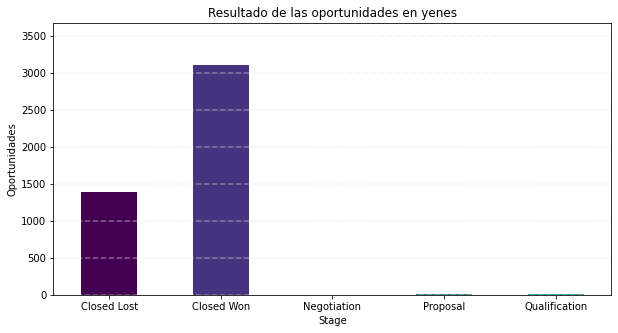

In [ ]:
graf2 = oportunidades_en_yenes['Oportunidades'].plot(kind='bar', figsize=(10,5), rot=360, title='Resultado de las oportunidades en yenes', color=colores)
ax = plt.gca()
ax.set_ylabel('Oportunidades')
ax.set_xlabel('Stage')
lineas = graf2.get_yticks()
for i in lineas:
      graf2.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')